# Assignment 2: Introduction to Data Science and AI - Group 4

|  <font size=4>Name</font>  | <font size=4>Working Hours</font>   |
|  :----  | :----  |
| <font size=4>Dimitrios Koutsakis</font>   | <font size=4>?</font> |
| <font size=4>Bingcheng Chen</font>  | <font size=4>?</font> |

In [291]:
from sklearn import linear_model
from sklearn import metrics
from itertools import product
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

%matplotlib inline

In [292]:
df = pd.read_csv('data_assignment2.csv')
df.isnull().sum()

ID                0
Living_area       0
Rooms             2
Land_size         1
Biarea           24
Age               0
Selling_price     0
dtype: int64

In [293]:
df.head()

,ID,Living_area,Rooms,Land_size,Biarea,Age,Selling_price
0,1,104,5.0,271.0,25.0,33,4600000
1,2,99,5.0,1506.0,6.0,88,4450000
2,3,133,6.0,486.0,NaN,44,4900000
3,4,175,7.0,728.0,NaN,14,6625000
4,5,118,6.0,1506.0,NaN,29,4600000


Model slope:     [[19370.13854733]]
Model intercept: [2220603.24335587]


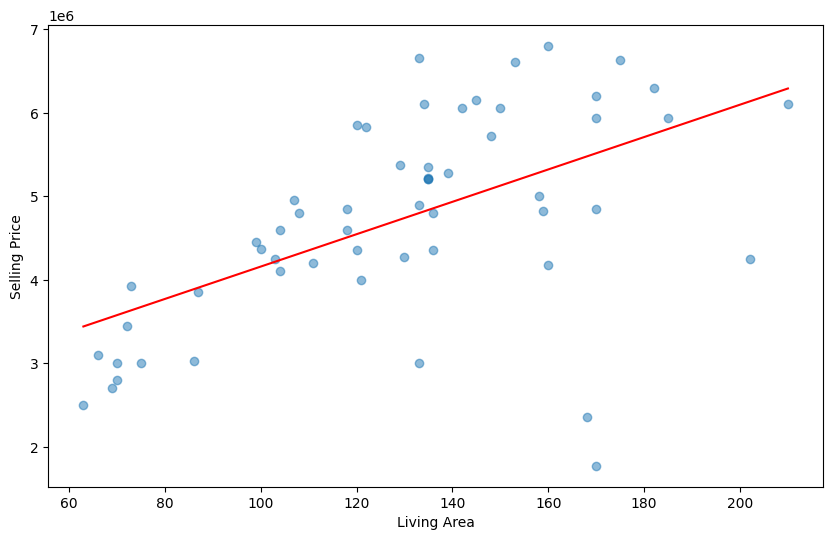

In [294]:
X = df['Living_area']
y = df['Selling_price']

model = LinearRegression(fit_intercept=True)
model.fit(X.values.reshape(-1, 1), y.values.reshape(-1, 1))

X_test = np.linspace(X.min(),X.max(),100)
y_test = model.predict(X_test.reshape(-1, 1)).flatten()

plt.figure(figsize = (10,6))
plt.scatter(X,y,alpha = 0.5)
plt.plot(X_test,y_test,color = 'r')
plt.xlabel('Living Area')
plt.ylabel('Selling Price')

print("Model slope:    ", model.coef_)
print("Model intercept:", model.intercept_)

In [295]:
predit = model.predict(np.array([10,100,150,200,1000]).reshape(-1, 1))
print('The selling prices predited for 10   m2 houses is: {:0.2f}'.format(predit[0][0]))
print('The selling prices predited for 100  m2 houses is: {:0.2f}'.format(predit[1][0]))
print('The selling prices predited for 150  m2 houses is: {:0.2f}'.format(predit[2][0]))
print('The selling prices predited for 200  m2 houses is: {:0.2f}'.format(predit[3][0]))
print('The selling prices predited for 1000 m2 houses is: {:0.2f}'.format(predit[4][0]))

The selling prices predited for 10   m2 houses is: 2414304.63
The selling prices predited for 100  m2 houses is: 4157617.10
The selling prices predited for 150  m2 houses is: 5126124.03
The selling prices predited for 200  m2 houses is: 6094630.95
The selling prices predited for 1000 m2 houses is: 21590741.79


In [296]:
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
df['target'] = pd.Series(iris['target'])
df['species'] = df['target'].replace([0,1,2],[species for species in iris['target_names'].tolist()])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


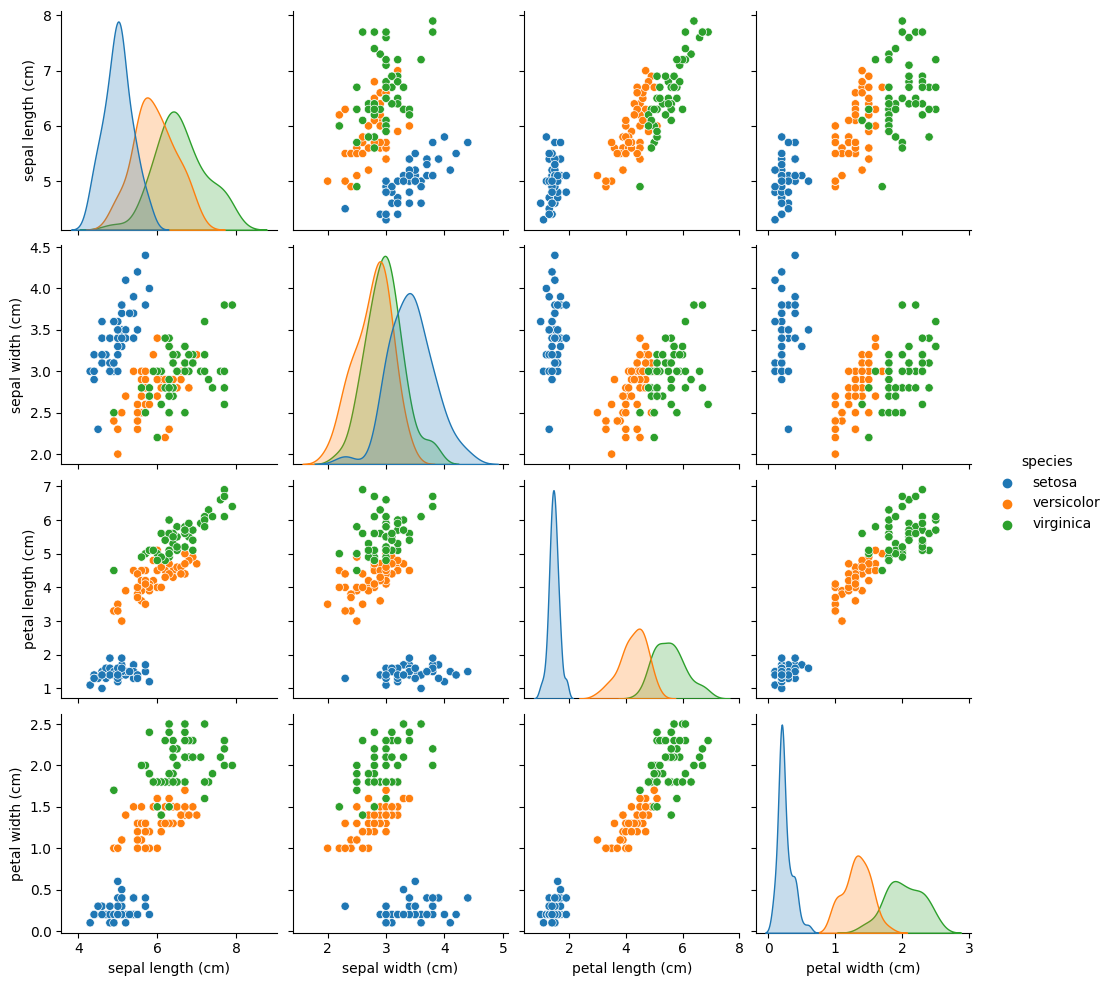

In [297]:
sns.pairplot(df.iloc[:,[0,1,2,3,5]],hue='species')

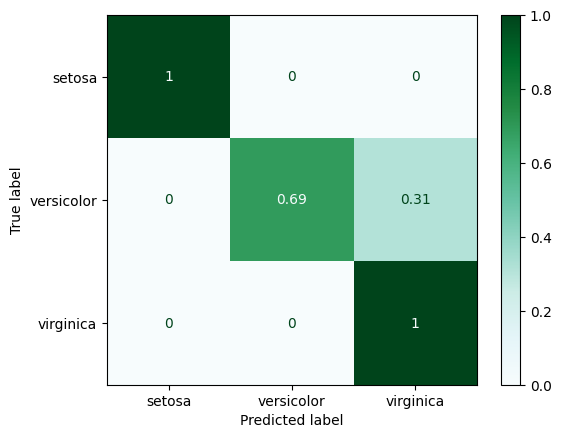

In [298]:
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=0)

logisticRegr = LogisticRegression(multi_class='auto', solver='liblinear')
logisticRegr.fit(x_train, y_train)

predictions = logisticRegr.predict(x_test)
metrics.ConfusionMatrixDisplay.from_predictions(y_test,predictions, normalize='true', cmap = 'BuGn', display_labels=iris.target_names)


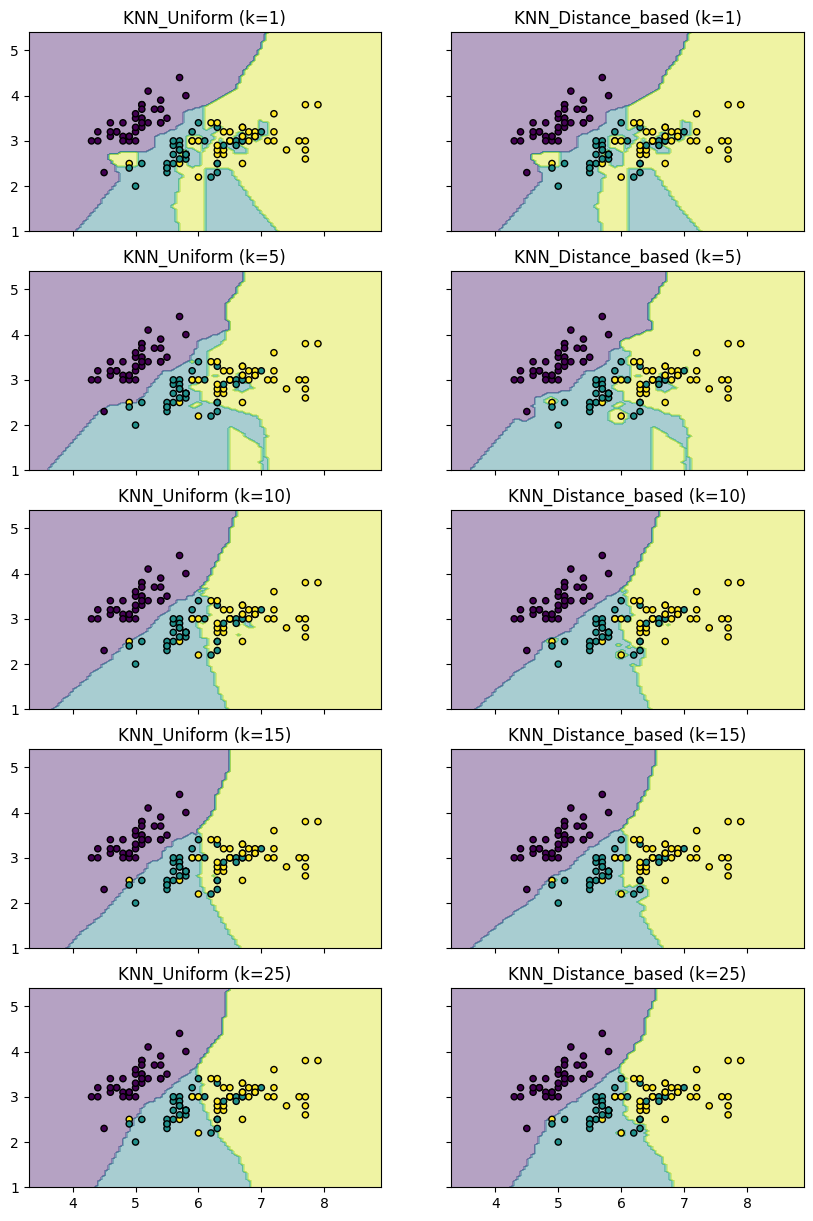

In [299]:
uniform_accuracy_score = []
distance_based_accuracy_score = []

f, axarr = plt.subplots(5, 2, sharex="col", sharey="row", figsize=(10, 15))

index_fig = []
for i in product([0,1,2,3,4], [0, 1]):
    index_fig.append(i)

for k in range(25):
    k = k+1

    model_uniform = KNeighborsClassifier(n_neighbors = k, weights='uniform')
    model_uniform.fit(x_train[:,0:2], y_train) 
    prediction_uniform = model_uniform.predict(x_test[:,0:2]) 
    # error_calculate_uniform = np.sqrt(mean_squared_error(y_test,prediction_uniform))
    accuracy_score_uniform = accuracy_score(y_test,prediction_uniform)
    uniform_accuracy_score.append(accuracy_score_uniform) 

    model_distance_based = KNeighborsClassifier(n_neighbors = k, weights='distance')
    model_distance_based.fit(x_train[:,0:2], y_train) 
    prediction_distance_based = model_distance_based.predict(x_test[:,0:2]) 
    # error_calculate_distance_based = np.sqrt(mean_squared_error(y_test,prediction_distance_based)) 
    accuracy_score_distance_based = accuracy_score(y_test,prediction_distance_based)
    distance_based_accuracy_score.append(accuracy_score_distance_based)

    X = x_train[:,0:2]
    y = y_train

    if k in [1,5,10,15,25]:
            index = [1,5,10,15,25].index(k)

            DecisionBoundaryDisplay.from_estimator(model_uniform, X, alpha=0.4, ax=axarr[index_fig[index*2][0],index_fig[index*2][1]], response_method="predict")
            DecisionBoundaryDisplay.from_estimator(model_distance_based, X, alpha=0.4, ax=axarr[index_fig[index*2+1][0],index_fig[index*2+1][1]], response_method="predict")
            
            axarr[index_fig[index*2][0], index_fig[index*2][1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
            axarr[index_fig[index*2][0], index_fig[index*2][1]].set_title("KNN_Uniform (k={})".format(k))
                                                                          
            axarr[index_fig[index*2+1][0], index_fig[index*2+1][1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
            axarr[index_fig[index*2+1][0], index_fig[index*2+1][1]].set_title("KNN_Distance_based (k={})".format(k)) 


[0.7368421052631579, 0.7368421052631579, 0.6842105263157895, 0.8157894736842105, 0.7368421052631579, 0.7368421052631579, 0.7105263157894737, 0.6842105263157895, 0.7105263157894737, 0.7368421052631579, 0.6842105263157895, 0.7368421052631579, 0.7368421052631579, 0.7368421052631579, 0.7368421052631579, 0.7368421052631579, 0.7368421052631579, 0.7631578947368421, 0.7631578947368421, 0.8157894736842105, 0.7894736842105263, 0.7631578947368421, 0.7631578947368421, 0.7631578947368421, 0.7631578947368421]
[0.7368421052631579, 0.7368421052631579, 0.6578947368421053, 0.6578947368421053, 0.6842105263157895, 0.6578947368421053, 0.6578947368421053, 0.631578947368421, 0.6578947368421053, 0.6578947368421053, 0.631578947368421, 0.6578947368421053, 0.6842105263157895, 0.6842105263157895, 0.6842105263157895, 0.6842105263157895, 0.6842105263157895, 0.6842105263157895, 0.6842105263157895, 0.6842105263157895, 0.6842105263157895, 0.6842105263157895, 0.7368421052631579, 0.6842105263157895, 0.6842105263157895]


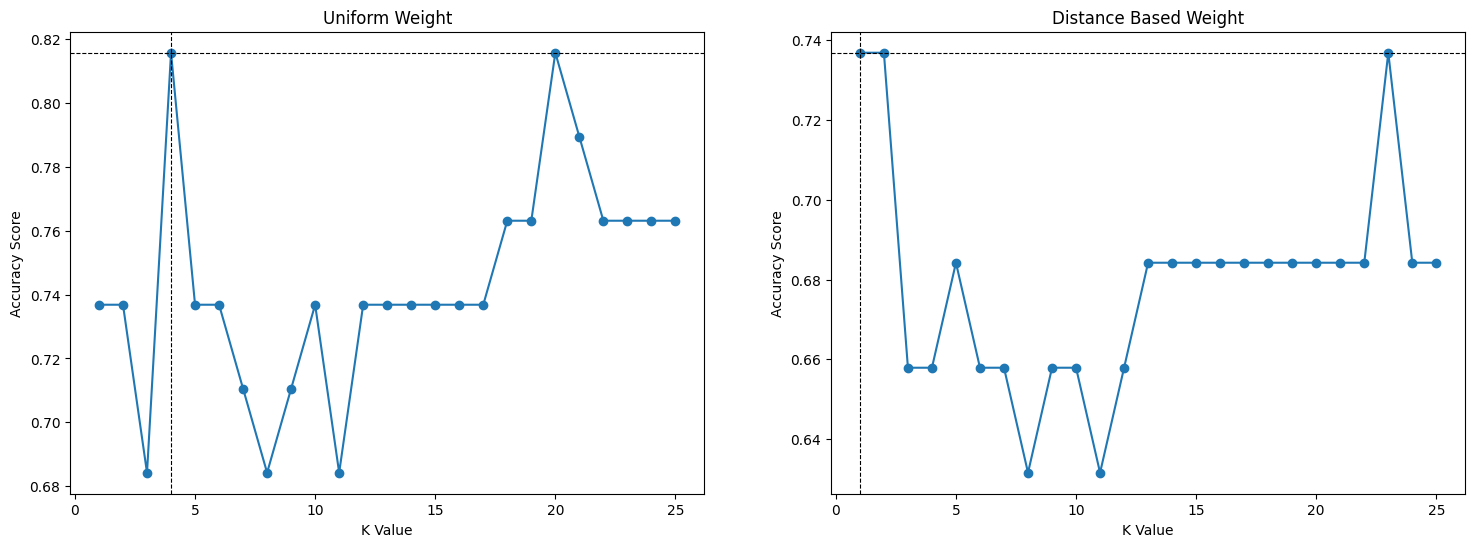

In [300]:
fig,(a1,a2) = plt.subplots(1,2,figsize = (18,6))
a1.plot(np.linspace(1,25,25),uniform_accuracy_score,marker = 'o')
a1.axhline(y = max(uniform_accuracy_score),linestyle = 'dashed',linewidth = 0.8,color = 'black')
a1.axvline(x = uniform_accuracy_score.index(max(uniform_accuracy_score))+1, linestyle = 'dashed',linewidth = 0.8,color = 'black')
a1.set_xlabel('K Value')
a1.set_ylabel('Accuracy Score')
a1.set_title('Uniform Weight')

a2.plot(np.linspace(1,25,25),distance_based_accuracy_score,marker = 'o')
a2.axhline(y = max(distance_based_accuracy_score),linestyle = 'dashed',linewidth = 0.8,color = 'black')
a2.axvline(x = distance_based_accuracy_score.index(max(distance_based_accuracy_score))+1, linestyle = 'dashed',linewidth = 0.8,color = 'black')
a2.set_xlabel('K Value')
a2.set_ylabel('Accuracy Score')
a2.set_title('Distance Based Weight')

print(uniform_accuracy_score)
print(distance_based_accuracy_score)